In [1]:
from cwgp.cwgp import CWGP
import seaborn as sns
import numpy as np

In [2]:
betas = np.random.exponential(scale=5,size=100)
betas = betas[np.newaxis].reshape(-1,1)

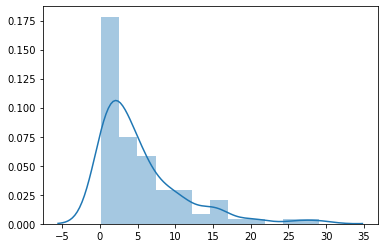

In [3]:
sns.distplot(betas)

In [4]:
def sal(par,y):
    return par[0]+par[1]*np.sinh(par[2]*np.arcsinh(y) + par[3])

In [5]:
model = CWGP(sal,betas).fit()

TypeError: comp_phi() takes 2 positional arguments but 3 were given